<a href="https://colab.research.google.com/github/thanuja-007/Resume-/blob/main/BLOCKCHAIN_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

5Requirement already satisfied: ecdsa in /usr/local/lib/python3.11/dist-packages (0.19.1)

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
1. Manufacturer
2. Distributor
3. Pharmacy
4. Patient
Pfizer registered as manufacturer

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
1. Manufacturer
2. Distributor
3. Pharmacy
4. Patient
ABC registered as distributor

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
1. Manufacturer
2. Distributor
3. Pharmacy
4. Patient
pharnaco registered as pharmacy

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
1. Manufacturer
2. Distributor
3. Pharmacy
4. Patient
thanuja registered as patient

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Logged in as 

,Index,Action,Drug ID,Creator,Hash
0,0,N/A,N/A,System,d9ed6019...
1,1,manufacture,0007,Pfizer,648c8e20...



=== Pharma Blockchain ===
User: pharnaco (pharmacy)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Logged out

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Logged in as Pfizer

=== Pharma Blockchain ===
User: Pfizer (manufacturer)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
1. Distributor
2. Pharmacy
3. Patient
Drug 0007 transferred to ABC

=== Pharma Blockchain ===
User: Pfizer (manufacturer)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit

1. View blockchain
2. View drug
3. QR code
4. Supply chain
5. Verify drug


,Index,Action,Drug ID,Creator,Hash
0,0,N/A,N/A,System,d9ed6019...
1,1,manufacture,0007,Pfizer,648c8e20...
2,2,transfer,0007,Pfizer,bc66be2d...



=== Pharma Blockchain ===
User: Pfizer (manufacturer)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit

1. View blockchain
2. View drug
3. QR code
4. Supply chain
5. Verify drug


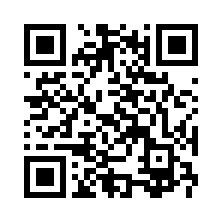


=== Pharma Blockchain ===
User: Pfizer (manufacturer)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit


In [ ]:
# Import required libraries
!pip install qrcode[pil] ecdsa pandas matplotlib
import hashlib
import json
from datetime import datetime
import pandas as pd
from IPython.display import display, Image
import qrcode
import ecdsa
import base64
import io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class EnhancedBlock:
    def __init__(self, index, timestamp, data, previous_hash, creator):
        self.index = index
        self.timestamp = timestamp
        self.data = data if isinstance(data, dict) else {"message": str(data)}
        self.previous_hash = previous_hash
        self.creator = creator
        self.signature = None
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        sha = hashlib.sha256()
        sha.update(str(self.index).encode())
        sha.update(str(self.timestamp).encode())
        sha.update(str(self.data).encode())
        sha.update(str(self.previous_hash).encode())
        sha.update(str(self.creator).encode())
        return sha.hexdigest()

    def sign_block(self, private_key):
        sk = ecdsa.SigningKey.from_string(bytes.fromhex(private_key), curve=ecdsa.SECP256k1)
        message = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}{self.creator}".encode()
        self.signature = base64.b64encode(sk.sign(message)).decode('utf-8')

    def verify_signature(self, public_key):
        if not self.signature:
            return False
        try:
            vk = ecdsa.VerifyingKey.from_string(bytes.fromhex(public_key), curve=ecdsa.SECP256k1)
            message = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}{self.creator}".encode()
            return vk.verify(base64.b64decode(self.signature), message)
        except:
            return False

class Drug:
    def __init__(self, drug_id, drug_name, manufacturer, details):
        self.drug_id = drug_id
        self.drug_name = drug_name
        self.manufacturer = manufacturer
        self.current_holder = manufacturer
        self.manufacture_date = datetime.now().isoformat()
        self.details = details
        self.qr_code = self._generate_qr_code()
        self.transaction_history = [{
            "from": "System",
            "to": manufacturer,
            "timestamp": datetime.now().isoformat(),
            "action": "Manufactured",
            "signed_by": manufacturer
        }]
        self.temperature_log = []
        self.location_log = []

    def _generate_qr_code(self):
        qr = qrcode.QRCode(version=1, box_size=6, border=4)
        qr.add_data(f"{self.drug_id}|{self.manufacturer}|{self.manufacture_date}")
        qr.make(fit=True)
        img = qr.make_image(fill_color="black", back_color="white")
        buffered = io.BytesIO()
        img.save(buffered, format="PNG", optimize=True)
        return base64.b64encode(buffered.getvalue()).decode('utf-8')

    def display_qr_code(self):
        display(Image(base64.b64decode(self.qr_code)))

    def add_transaction(self, from_entity, to_entity, action, conditions=None, signed_by=None):
        self.transaction_history.append({
            "from": from_entity,
            "to": to_entity,
            "timestamp": datetime.now().isoformat(),
            "action": action,
            "conditions": conditions,
            "signed_by": signed_by or from_entity
        })
        self.current_holder = to_entity

    def add_sensor_data(self, temperature=None, location=None, by_entity=None):
        if temperature is not None:
            self.temperature_log.append({
                "temperature": temperature,
                "timestamp": datetime.now().isoformat(),
                "recorded_by": by_entity
            })
        if location is not None:
            self.location_log.append({
                "location": location,
                "timestamp": datetime.now().isoformat(),
                "recorded_by": by_entity
            })

class StakeholderManager:
    def __init__(self):
        self.stakeholders = {
            "manufacturer": {},
            "distributor": {},
            "pharmacy": {},
            "patient": {}
        }
        self.private_keys = {}
        self.public_keys = {}

    def generate_key_pair(self, entity):
        sk = ecdsa.SigningKey.generate(curve=ecdsa.SECP256k1)
        vk = sk.get_verifying_key()
        self.private_keys[entity] = sk.to_string().hex()
        self.public_keys[entity] = vk.to_string().hex()
        return self.public_keys[entity]

    def register_stakeholder(self, name, role, location=None, license=None):
        if role not in self.stakeholders:
            return False, "Invalid role"
        if any(name in entities for entities in self.stakeholders.values()):
            return False, "Entity already registered"
        pub_key = self.generate_key_pair(name)
        self.stakeholders[role][name] = {
            "public_key": pub_key,
            "location": location,
            "license": license,
            "registration_date": datetime.now().isoformat()
        }
        return True, f"{name} registered as {role}"

    def get_public_key(self, entity):
        for role, entities in self.stakeholders.items():
            if entity in entities:
                return entities[entity]["public_key"]
        return None

    def verify_role(self, entity, role):
        return role in self.stakeholders and entity in self.stakeholders[role]

    def get_stakeholder_info(self, entity):
        for role, entities in self.stakeholders.items():
            if entity in entities:
                return {
                    "role": role,
                    "details": entities[entity]
                }
        return None

class EnhancedDrugBlockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.drugs = {}
        self.stakeholder_manager = StakeholderManager()

    def create_genesis_block(self):
        return EnhancedBlock(0, datetime.now(), "Genesis Block", "0", "System")

    def register_stakeholder(self, name, role, location=None, license=None):
        return self.stakeholder_manager.register_stakeholder(name, role, location, license)

    def manufacture_drug(self, drug_id, drug_name, manufacturer, details):
        if not self.stakeholder_manager.verify_role(manufacturer, "manufacturer"):
            return False, "Only manufacturers can create drugs"
        if drug_id in self.drugs:
            return False, "Drug ID already exists"

        self.drugs[drug_id] = Drug(drug_id, drug_name, manufacturer, details)
        new_block = EnhancedBlock(
            len(self.chain),
            datetime.now(),
            {
                "action": "manufacture",
                "drug_id": drug_id,
                "manufacturer": manufacturer
            },
            self.get_latest_block().hash,
            manufacturer
        )
        new_block.sign_block(self.stakeholder_manager.private_keys[manufacturer])
        self.chain.append(new_block)
        return True, f"Drug {drug_id} manufactured by {manufacturer}"

    def add_sensor_data(self, drug_id, temperature=None, location=None, by_entity=None):
        if drug_id not in self.drugs:
            return False, "Drug not found"
        drug = self.drugs[drug_id]
        if by_entity != drug.current_holder:
            return False, f"{by_entity} is not the current holder"

        drug.add_sensor_data(temperature, location, by_entity)
        new_block = EnhancedBlock(
            len(self.chain),
            datetime.now(),
            {
                "action": "sensor_update",
                "drug_id": drug_id,
                "t": temperature,
                "l": location
            },
            self.get_latest_block().hash,
            by_entity
        )
        new_block.sign_block(self.stakeholder_manager.private_keys[by_entity])
        self.chain.append(new_block)
        return True, f"Sensor data updated for drug {drug_id}"

    def transfer_drug(self, drug_id, from_entity, to_entity, to_role, conditions=None):
        if drug_id not in self.drugs:
            return False, "Drug not found"
        drug = self.drugs[drug_id]
        if drug.current_holder != from_entity:
            return False, f"{from_entity} is not the current holder"
        if not self.stakeholder_manager.verify_role(to_entity, to_role):
            return False, f"Invalid recipient or role"

        if conditions and "max_temperature" in conditions and drug.temperature_log:
            last_temp = drug.temperature_log[-1]["temperature"]
            if last_temp > conditions["max_temperature"]:
                return False, f"Temperature {last_temp} exceeds maximum {conditions['max_temperature']}"

        drug.add_transaction(from_entity, to_entity, "Transfer", conditions, from_entity)
        new_block = EnhancedBlock(
            len(self.chain),
            datetime.now(),
            {
                "action": "transfer",
                "drug_id": drug_id,
                "from": from_entity,
                "to": to_entity
            },
            self.get_latest_block().hash,
            from_entity
        )
        new_block.sign_block(self.stakeholder_manager.private_keys[from_entity])
        self.chain.append(new_block)
        return True, f"Drug {drug_id} transferred to {to_entity}"

    def get_latest_block(self):
        return self.chain[-1]

    def verify_drug(self, drug_id):
        if drug_id not in self.drugs:
            return {"status": "error", "message": "Drug not found"}
        drug = self.drugs[drug_id]
        risk_factors = 0
        temp_violations = 0

        if "max_temperature" in drug.details:
            temp_violations = sum(1 for t in drug.temperature_log
                                if t["temperature"] > drug.details["max_temperature"])

        risk_score = min(100, temp_violations * 20)
        return {
            "drug_id": drug_id,
            "counterfeit_risk": "High" if risk_score > 70 else "Medium" if risk_score > 30 else "Low",
            "risk_score": risk_score,
            "temp_violations": temp_violations,
            "blockchain_valid": self.is_chain_valid()
        }

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i-1]
            if current.hash != current.calculate_hash():
                return False
            if current.previous_hash != previous.hash:
                return False
            if not current.verify_signature(self.stakeholder_manager.get_public_key(current.creator)):
                return False
        return True

    def visualize_supply_chain(self, drug_id):
        if drug_id not in self.drugs:
            print("Drug not found")
            return
        drug = self.drugs[drug_id]
        print(f"\nSupply Chain for {drug_id}")
        print("="*40)
        for tx in drug.transaction_history[-5:]:
            print(f"{tx['action']} from {tx['from']} to {tx['to']} at {tx['timestamp']}")

        if drug.temperature_log:
            plt.figure(figsize=(8, 3))
            temps = [x["temperature"] for x in drug.temperature_log[-20:]]
            plt.plot(temps, 'b-o', markersize=4)
            if "max_temperature" in drug.details:
                plt.axhline(y=drug.details["max_temperature"], color='r', linestyle='--', linewidth=1)
            plt.title(f"Temperature for {drug_id}")
            plt.tight_layout()
            plt.show()

    def display_qr_code(self, drug_id):
        if drug_id in self.drugs:
            self.drugs[drug_id].display_qr_code()
        else:
            print("Drug not found")

    def display_blockchain(self):
        chain_data = []
        for block in self.chain[-10:]:
            chain_data.append({
                "Index": block.index,
                "Action": block.data.get("action", "N/A"),
                "Drug ID": block.data.get("drug_id", "N/A"),
                "Creator": block.creator,
                "Hash": block.hash[:8] + "..."
            })
        return pd.DataFrame(chain_data)

class DrugBlockchainCLI:
    def __init__(self):
        self.blockchain = EnhancedDrugBlockchain()
        self.current_user = None

    def show_menu(self):
        print("\n=== Pharma Blockchain ===")
        if self.current_user:
            info = self.blockchain.stakeholder_manager.get_stakeholder_info(self.current_user)
            print(f"User: {self.current_user} ({info['role']})")
        print("\n1. Register\n2. Manufacture\n3. Sensor data\n4. Transfer\n5. View\n6. Login/out\n7. Exit")

    def main_menu(self):
        while True:
            self.show_menu()
            choice = input("Select option (1-7): ")

            if choice == '1':
                self.register_menu()
            elif choice == '2':
                self.manufacture_menu()
            elif choice == '3':
                self.sensor_menu()
            elif choice == '4':
                self.transfer_menu()
            elif choice == '5':
                self.view_menu()
            elif choice == '6':
                self.login_menu()
            elif choice == '7':
                print("Exiting...")
                break
            else:
                print("Invalid choice")

    def register_menu(self):
        name = input("Enter entity name: ")
        print("1. Manufacturer\n2. Distributor\n3. Pharmacy\n4. Patient")
        role_choice = input("Select role (1-4): ")
        role = {'1': 'manufacturer', '2': 'distributor', '3': 'pharmacy', '4': 'patient'}.get(role_choice)
        if not role:
            print("Invalid choice")
            return

        location = license = None
        if role != 'patient':
            location = input("Location/address: ")
            license = input("License number: ")

        success, message = self.blockchain.register_stakeholder(name, role, location, license)
        print(message)

    def manufacture_menu(self):
        if not self.current_user:
            print("Please login first")
            return

        info = self.blockchain.stakeholder_manager.get_stakeholder_info(self.current_user)
        if info['role'] != 'manufacturer':
            print("Only manufacturers can create drugs")
            return

        drug_id = input("Enter drug ID: ")
        drug_name = input("Enter drug name: ")
        details = {
            "max_temperature": float(input("Max storage temperature (°C): ")),
            "batch_no": input("Batch number: "),
            "expiry_date": input("Expiry date (YYYY-MM-DD): ")
        }

        success, message = self.blockchain.manufacture_drug(drug_id, drug_name, self.current_user, details)
        print(message)

    def sensor_menu(self):
        if not self.current_user:
            print("Please login first")
            return

        drug_id = input("Enter drug ID: ")
        if drug_id not in self.blockchain.drugs:
            print("Drug not found")
            return

        drug = self.blockchain.drugs[drug_id]
        if drug.current_holder != self.current_user:
            print(f"Current holder: {drug.current_holder}")
            return

        temp = input("Temperature (°C, leave blank if none): ")
        location = input("Location (leave blank if none): ")
        temp = float(temp) if temp else None
        success, message = self.blockchain.add_sensor_data(drug_id, temp, location, self.current_user)
        print(message)

    def transfer_menu(self):
        if not self.current_user:
            print("Please login first")
            return

        drug_id = input("Enter drug ID: ")
        if drug_id not in self.blockchain.drugs:
            print("Drug not found")
            return

        drug = self.blockchain.drugs[drug_id]
        if drug.current_holder != self.current_user:
            print(f"Current holder: {drug.current_holder}")
            return

        print("1. Distributor\n2. Pharmacy\n3. Patient")
        role_choice = input("Select recipient role (1-3): ")
        role = {'1': 'distributor', '2': 'pharmacy', '3': 'patient'}.get(role_choice)
        if not role:
            print("Invalid choice")
            return

        to_entity = input(f"Enter {role} name: ")
        if not self.blockchain.stakeholder_manager.verify_role(to_entity, role):
            print(f"Recipient {to_entity} is not a registered {role}")
            return

        conditions = {}
        if 'max_temperature' in drug.details:
            conditions['max_temperature'] = drug.details['max_temperature']

        success, message = self.blockchain.transfer_drug(drug_id, self.current_user, to_entity, role, conditions)
        print(message)

    def view_menu(self):
        print("\n1. View blockchain\n2. View drug\n3. QR code\n4. Supply chain\n5. Verify drug")
        choice = input("Select option (1-5): ")

        if choice == '1':
            display(self.blockchain.display_blockchain())
        elif choice == '2':
            drug_id = input("Enter drug ID: ")
            if drug_id in self.blockchain.drugs:
                drug = self.blockchain.drugs[drug_id]
                print(f"\nDrug: {drug.drug_name}")
                print(f"Current holder: {drug.current_holder}")
                print(f"Transactions: {len(drug.transaction_history)}")
                print(f"Temp readings: {len(drug.temperature_log)}")
            else:
                print("Drug not found")
        elif choice == '3':
            drug_id = input("Enter drug ID: ")
            self.blockchain.display_qr_code(drug_id)
        elif choice == '4':
            drug_id = input("Enter drug ID: ")
            self.blockchain.visualize_supply_chain(drug_id)
        elif choice == '5':
            drug_id = input("Enter drug ID: ")
            result = self.blockchain.verify_drug(drug_id)
            if "status" in result and result["status"] == "error":
                print(result["message"])
            else:
                print(f"\nRisk: {result['counterfeit_risk']} ({result['risk_score']}/100)")
                print(f"Temp violations: {result['temp_violations']}")
        else:
            print("Invalid choice")

    def login_menu(self):
        if self.current_user:
            self.current_user = None
            print("Logged out")
        else:
            name = input("Enter your entity name: ")
            if self.blockchain.stakeholder_manager.get_stakeholder_info(name):
                self.current_user = name
                print(f"Logged in as {name}")
            else:
                print("Entity not registered")

if __name__ == "__main__":
    cli = DrugBlockchainCLI()
    cli.main_menu()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 1
Enter entity name: Pfizer
1. Manufacturer
2. Distributor
3. Pharmacy
4. Patient
Select role (1-4): 1
Location/address: Delhi
License number: 0001
Pfizer registered as manufacturer

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 1
Enter entity name: Owens & Minor 
1. Manufacturer
2. Distributor
3. Pharmacy
4. Patient
Select role (1-4): 2
Location/address: Mumbai
License number: 0002
Owens & Minor  registered as distributor

=== Pharma Blockchain ===

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 1
Enter entity name: Pharmaco
1. Manufacturer
2. Distributor
3. Ph

,Index,Action,Drug ID,Creator,Hash,Manufacturer,From,To
0,0,N/A,N/A,System,0b35e03d...,NaN,NaN,NaN
1,1,manufacture,0007,Pfizer,52888ec6...,Pfizer,NaN,NaN
2,2,sensor_update,0007,Pfizer,452fefeb...,NaN,NaN,NaN
3,3,transfer,0007,Pfizer,a04d1621...,NaN,Pfizer,AmerisourceBergen
4,4,sensor_update,0007,AmerisourceBergen,eb6ab790...,NaN,NaN,NaN
5,5,transfer,0007,AmerisourceBergen,1b220c0e...,NaN,AmerisourceBergen,Pharmaco
6,6,sensor_update,0007,Pharmaco,5b6f0960...,NaN,NaN,NaN
7,7,transfer,0007,Pharmaco,185d2cac...,NaN,Pharmaco,Thanuja



=== Pharma Blockchain ===
User: Pharmaco (pharmacy)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 5

1. View blockchain
2. View drug
3. QR code
4. Supply chain
5. Verify drug
Select option (1-5): 3
Enter drug ID: 0007


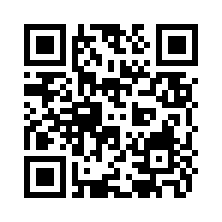


=== Pharma Blockchain ===
User: Pharmaco (pharmacy)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 5

1. View blockchain
2. View drug
3. QR code
4. Supply chain
5. Verify drug
Select option (1-5): 2
Enter drug ID: 0007

Drug: Dolo
Current holder: Thanuja
Transactions: 4
Temp readings: 3

=== Pharma Blockchain ===
User: Pharmaco (pharmacy)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 5

1. View blockchain
2. View drug
3. QR code
4. Supply chain
5. Verify drug
Select option (1-5): 4
Enter drug ID: 0007

Supply Chain for 0007
Manufactured from System to Pfizer at 2025-06-27T02:40:43.751398
Transfer from Pfizer to AmerisourceBergen at 2025-06-27T02:49:47.043956
Transfer from AmerisourceBergen to Pharmaco at 2025-06-27T02:52:21.274281
Transfer from Pharmaco to Thanuja at 2025-06-27T02:54:33.689700


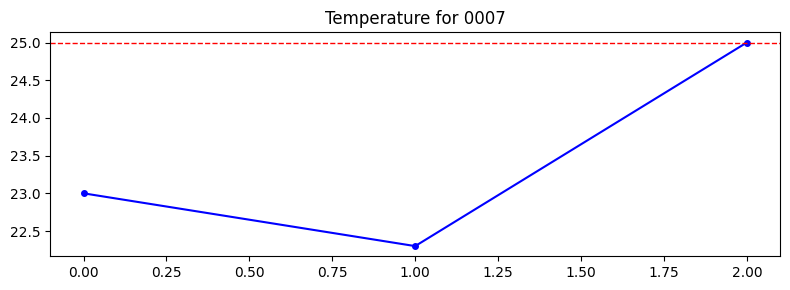


=== Pharma Blockchain ===
User: Pharmaco (pharmacy)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 5

1. View blockchain
2. View drug
3. QR code
4. Supply chain
5. Verify drug
Select option (1-5): 5
Enter drug ID: 0007

Risk: Low (0/100)
Temp violations: 0

=== Pharma Blockchain ===
User: Pharmaco (pharmacy)

1. Register
2. Manufacture
3. Sensor data
4. Transfer
5. View
6. Login/out
7. Exit
Select option (1-7): 7
Exiting...
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
# Import required libraries
!pip install qrcode[pil] ecdsa pandas matplotlib
import hashlib
import json
from datetime import datetime
import pandas as pd
from IPython.display import display, Image
import qrcode
import ecdsa
import base64
import io
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

class EnhancedBlock:
    def __init__(self, index, timestamp, data, previous_hash, creator):
        self.index = index
        self.timestamp = timestamp
        self.data = data if isinstance(data, dict) else {"message": str(data)}
        self.previous_hash = previous_hash
        self.creator = creator
        self.signature = None
        self.hash = self.calculate_hash()

    def calculate_hash(self):
        sha = hashlib.sha256()
        sha.update(str(self.index).encode())
        sha.update(str(self.timestamp).encode())
        sha.update(str(self.data).encode())
        sha.update(str(self.previous_hash).encode())
        sha.update(str(self.creator).encode())
        return sha.hexdigest()

    def sign_block(self, private_key):
        sk = ecdsa.SigningKey.from_string(bytes.fromhex(private_key), curve=ecdsa.SECP256k1)
        message = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}{self.creator}".encode()
        self.signature = base64.b64encode(sk.sign(message)).decode('utf-8')

    def verify_signature(self, public_key):
        if not self.signature:
            return False
        try:
            vk = ecdsa.VerifyingKey.from_string(bytes.fromhex(public_key), curve=ecdsa.SECP256k1)
            message = f"{self.index}{self.timestamp}{self.data}{self.previous_hash}{self.creator}".encode()
            return vk.verify(base64.b64decode(self.signature), message)
        except:
            return False

class Drug:
    def __init__(self, drug_id, drug_name, manufacturer, details):
        self.drug_id = drug_id
        self.drug_name = drug_name
        self.manufacturer = manufacturer
        self.current_holder = manufacturer
        self.manufacture_date = datetime.now().isoformat()
        self.details = details
        self.qr_code = self._generate_qr_code()
        self.transaction_history = [{
            "from": "System",
            "to": manufacturer,
            "timestamp": datetime.now().isoformat(),
            "action": "Manufactured",
            "signed_by": manufacturer
        }]
        self.temperature_log = []
        self.location_log = []

    def _generate_qr_code(self):
        qr = qrcode.QRCode(version=1, box_size=6, border=4)
        qr.add_data(f"{self.drug_id}|{self.manufacturer}|{self.manufacture_date}")
        qr.make(fit=True)
        img = qr.make_image(fill_color="black", back_color="white")
        buffered = io.BytesIO()
        img.save(buffered, format="PNG", optimize=True)
        return base64.b64encode(buffered.getvalue()).decode('utf-8')

    def display_qr_code(self):
        display(Image(base64.b64decode(self.qr_code)))

    def add_transaction(self, from_entity, to_entity, action, conditions=None, signed_by=None):
        self.transaction_history.append({
            "from": from_entity,
            "to": to_entity,
            "timestamp": datetime.now().isoformat(),
            "action": action,
            "conditions": conditions,
            "signed_by": signed_by or from_entity
        })
        self.current_holder = to_entity

    def add_sensor_data(self, temperature=None, location=None, by_entity=None):
        if temperature is not None:
            self.temperature_log.append({
                "temperature": temperature,
                "timestamp": datetime.now().isoformat(),
                "recorded_by": by_entity
            })
        if location is not None:
            self.location_log.append({
                "location": location,
                "timestamp": datetime.now().isoformat(),
                "recorded_by": by_entity
            })

class StakeholderManager:
    def __init__(self):
        self.stakeholders = {
            "manufacturer": {},
            "distributor": {},
            "pharmacy": {},
            "patient": {}
        }
        self.private_keys = {}
        self.public_keys = {}

    def generate_key_pair(self, entity):
        sk = ecdsa.SigningKey.generate(curve=ecdsa.SECP256k1)
        vk = sk.get_verifying_key()
        self.private_keys[entity] = sk.to_string().hex()
        self.public_keys[entity] = vk.to_string().hex()
        return self.public_keys[entity]

    def register_stakeholder(self, name, role, location=None, license=None):
        if role not in self.stakeholders:
            return False, "Invalid role"
        if any(name in entities for entities in self.stakeholders.values()):
            return False, "Entity already registered"
        pub_key = self.generate_key_pair(name)
        self.stakeholders[role][name] = {
            "public_key": pub_key,
            "location": location,
            "license": license,
            "registration_date": datetime.now().isoformat()
        }
        return True, f"{name} registered as {role}"

    def get_public_key(self, entity):
        for role, entities in self.stakeholders.items():
            if entity in entities:
                return entities[entity]["public_key"]
        return None

    def verify_role(self, entity, role):
        return role in self.stakeholders and entity in self.stakeholders[role]

    def get_stakeholder_info(self, entity):
        for role, entities in self.stakeholders.items():
            if entity in entities:
                return {
                    "role": role,
                    "details": entities[entity]
                }
        return None

class EnhancedDrugBlockchain:
    def __init__(self):
        self.chain = [self.create_genesis_block()]
        self.drugs = {}
        self.stakeholder_manager = StakeholderManager()

    def create_genesis_block(self):
        return EnhancedBlock(0, datetime.now(), "Genesis Block", "0", "System")

    def register_stakeholder(self, name, role, location=None, license=None):
        return self.stakeholder_manager.register_stakeholder(name, role, location, license)

    def manufacture_drug(self, drug_id, drug_name, manufacturer, details):
        if not self.stakeholder_manager.verify_role(manufacturer, "manufacturer"):
            return False, "Only manufacturers can create drugs"
        if drug_id in self.drugs:
            return False, "Drug ID already exists"

        self.drugs[drug_id] = Drug(drug_id, drug_name, manufacturer, details)
        new_block = EnhancedBlock(
            len(self.chain),
            datetime.now(),
            {
                "action": "manufacture",
                "drug_id": drug_id,
                "manufacturer": manufacturer
            },
            self.get_latest_block().hash,
            manufacturer
        )
        new_block.sign_block(self.stakeholder_manager.private_keys[manufacturer])
        self.chain.append(new_block)
        return True, f"Drug {drug_id} manufactured by {manufacturer}"

    def add_sensor_data(self, drug_id, temperature=None, location=None, by_entity=None):
        if drug_id not in self.drugs:
            return False, "Drug not found"
        drug = self.drugs[drug_id]
        if by_entity != drug.current_holder:
            return False, f"{by_entity} is not the current holder"

        drug.add_sensor_data(temperature, location, by_entity)
        new_block = EnhancedBlock(
            len(self.chain),
            datetime.now(),
            {
                "action": "sensor_update",
                "drug_id": drug_id,
                "t": temperature,
                "l": location
            },
            self.get_latest_block().hash,
            by_entity
        )
        new_block.sign_block(self.stakeholder_manager.private_keys[by_entity])
        self.chain.append(new_block)
        return True, f"Sensor data updated for drug {drug_id}"

    def transfer_drug(self, drug_id, from_entity, to_entity, to_role, conditions=None):
        if drug_id not in self.drugs:
            return False, "Drug not found"
        drug = self.drugs[drug_id]
        if drug.current_holder != from_entity:
            return False, f"{from_entity} is not the current holder"
        if not self.stakeholder_manager.verify_role(to_entity, to_role):
            return False, f"Invalid recipient or role"

        if conditions and "max_temperature" in conditions and drug.temperature_log:
            last_temp = drug.temperature_log[-1]["temperature"]
            if last_temp > conditions["max_temperature"]:
                return False, f"Temperature {last_temp} exceeds maximum {conditions['max_temperature']}"

        drug.add_transaction(from_entity, to_entity, "Transfer", conditions, from_entity)
        new_block = EnhancedBlock(
            len(self.chain),
            datetime.now(),
            {
                "action": "transfer",
                "drug_id": drug_id,
                "from": from_entity,
                "to": to_entity
            },
            self.get_latest_block().hash,
            from_entity
        )
        new_block.sign_block(self.stakeholder_manager.private_keys[from_entity])
        self.chain.append(new_block)
        return True, f"Drug {drug_id} transferred to {to_entity}"

    def get_latest_block(self):
        return self.chain[-1]

    def verify_drug(self, drug_id):
        if drug_id not in self.drugs:
            return {"status": "error", "message": "Drug not found"}
        drug = self.drugs[drug_id]
        risk_factors = 0
        temp_violations = 0

        if "max_temperature" in drug.details:
            temp_violations = sum(1 for t in drug.temperature_log
                                if t["temperature"] > drug.details["max_temperature"])

        risk_score = min(100, temp_violations * 20)
        return {
            "drug_id": drug_id,
            "counterfeit_risk": "High" if risk_score > 70 else "Medium" if risk_score > 30 else "Low",
            "risk_score": risk_score,
            "temp_violations": temp_violations,
            "blockchain_valid": self.is_chain_valid()
        }

    def is_chain_valid(self):
        for i in range(1, len(self.chain)):
            current = self.chain[i]
            previous = self.chain[i-1]
            if current.hash != current.calculate_hash():
                return False
            if current.previous_hash != previous.hash:
                return False
            if not current.verify_signature(self.stakeholder_manager.get_public_key(current.creator)):
                return False
        return True

    def visualize_supply_chain(self, drug_id):
        if drug_id not in self.drugs:
            print("Drug not found")
            return
        drug = self.drugs[drug_id]
        print(f"\nSupply Chain for {drug_id}")
        print("="*40)
        for tx in drug.transaction_history[-5:]:
            print(f"{tx['action']} from {tx['from']} to {tx['to']} at {tx['timestamp']}")

        if drug.temperature_log:
            plt.figure(figsize=(8, 3))
            temps = [x["temperature"] for x in drug.temperature_log[-20:]]
            plt.plot(temps, 'b-o', markersize=4)
            if "max_temperature" in drug.details:
                plt.axhline(y=drug.details["max_temperature"], color='r', linestyle='--', linewidth=1)
            plt.title(f"Temperature for {drug_id}")
            plt.tight_layout()
            plt.show()

    def display_qr_code(self, drug_id):
        if drug_id in self.drugs:
            self.drugs[drug_id].display_qr_code()
        else:
            print("Drug not found")

    def display_blockchain(self):
        chain_data = []
        for block in self.chain[-10:]:
            row = {
                "Index": block.index,
                "Action": block.data.get("action", "N/A"),
                "Drug ID": block.data.get("drug_id", "N/A"),
                "Creator": block.creator,
                "Hash": block.hash[:8] + "..."
            }
            # Add receiver information for transfer actions
            if block.data.get("action") == "transfer":
                row["From"] = block.data.get("from", "N/A")
                row["To"] = block.data.get("to", "N/A")
            elif block.data.get("action") == "manufacture":
                row["Manufacturer"] = block.data.get("manufacturer", "N/A")
            chain_data.append(row)
        return pd.DataFrame(chain_data)

class DrugBlockchainCLI:
    def __init__(self):
        self.blockchain = EnhancedDrugBlockchain()
        self.current_user = None

    def show_menu(self):
        print("\n=== Pharma Blockchain ===")
        if self.current_user:
            info = self.blockchain.stakeholder_manager.get_stakeholder_info(self.current_user)
            print(f"User: {self.current_user} ({info['role']})")
        print("\n1. Register\n2. Manufacture\n3. Sensor data\n4. Transfer\n5. View\n6. Login/out\n7. Exit")

    def main_menu(self):
        while True:
            self.show_menu()
            choice = input("Select option (1-7): ")

            if choice == '1':
                self.register_menu()
            elif choice == '2':
                self.manufacture_menu()
            elif choice == '3':
                self.sensor_menu()
            elif choice == '4':
                self.transfer_menu()
            elif choice == '5':
                self.view_menu()
            elif choice == '6':
                self.login_menu()
            elif choice == '7':
                print("Exiting...")
                break
            else:
                print("Invalid choice")

    def register_menu(self):
        name = input("Enter entity name: ")
        print("1. Manufacturer\n2. Distributor\n3. Pharmacy\n4. Patient")
        role_choice = input("Select role (1-4): ")
        role = {'1': 'manufacturer', '2': 'distributor', '3': 'pharmacy', '4': 'patient'}.get(role_choice)
        if not role:
            print("Invalid choice")
            return

        location = license = None
        if role != 'patient':
            location = input("Location/address: ")
            license = input("License number: ")

        success, message = self.blockchain.register_stakeholder(name, role, location, license)
        print(message)

    def manufacture_menu(self):
        if not self.current_user:
            print("Please login first")
            return

        info = self.blockchain.stakeholder_manager.get_stakeholder_info(self.current_user)
        if info['role'] != 'manufacturer':
            print("Only manufacturers can create drugs")
            return

        drug_id = input("Enter drug ID: ")
        drug_name = input("Enter drug name: ")
        details = {
            "max_temperature": float(input("Max storage temperature (°C): ")),
            "batch_no": input("Batch number: "),
            "expiry_date": input("Expiry date (YYYY-MM-DD): ")
        }

        success, message = self.blockchain.manufacture_drug(drug_id, drug_name, self.current_user, details)
        print(message)

    def sensor_menu(self):
        if not self.current_user:
            print("Please login first")
            return

        drug_id = input("Enter drug ID: ")
        if drug_id not in self.blockchain.drugs:
            print("Drug not found")
            return

        drug = self.blockchain.drugs[drug_id]
        if drug.current_holder != self.current_user:
            print(f"Current holder: {drug.current_holder}")
            return

        temp = input("Temperature (°C, leave blank if none): ")
        location = input("Location (leave blank if none): ")
        temp = float(temp) if temp else None
        success, message = self.blockchain.add_sensor_data(drug_id, temp, location, self.current_user)
        print(message)

    def transfer_menu(self):
        if not self.current_user:
            print("Please login first")
            return

        drug_id = input("Enter drug ID: ")
        if drug_id not in self.blockchain.drugs:
            print("Drug not found")
            return

        drug = self.blockchain.drugs[drug_id]
        if drug.current_holder != self.current_user:
            print(f"Current holder: {drug.current_holder}")
            return

        print("1. Distributor\n2. Pharmacy\n3. Patient")
        role_choice = input("Select recipient role (1-3): ")
        role = {'1': 'distributor', '2': 'pharmacy', '3': 'patient'}.get(role_choice)
        if not role:
            print("Invalid choice")
            return

        to_entity = input(f"Enter {role} name: ")
        if not self.blockchain.stakeholder_manager.verify_role(to_entity, role):
            print(f"Recipient {to_entity} is not a registered {role}")
            return

        conditions = {}
        if 'max_temperature' in drug.details:
            conditions['max_temperature'] = drug.details['max_temperature']

        success, message = self.blockchain.transfer_drug(drug_id, self.current_user, to_entity, role, conditions)
        print(message)

    def view_menu(self):
        print("\n1. View blockchain\n2. View drug\n3. QR code\n4. Supply chain\n5. Verify drug")
        choice = input("Select option (1-5): ")

        if choice == '1':
            display(self.blockchain.display_blockchain())
        elif choice == '2':
            drug_id = input("Enter drug ID: ")
            if drug_id in self.blockchain.drugs:
                drug = self.blockchain.drugs[drug_id]
                print(f"\nDrug: {drug.drug_name}")
                print(f"Current holder: {drug.current_holder}")
                print(f"Transactions: {len(drug.transaction_history)}")
                print(f"Temp readings: {len(drug.temperature_log)}")
            else:
                print("Drug not found")
        elif choice == '3':
            drug_id = input("Enter drug ID: ")
            self.blockchain.display_qr_code(drug_id)
        elif choice == '4':
            drug_id = input("Enter drug ID: ")
            self.blockchain.visualize_supply_chain(drug_id)
        elif choice == '5':
            drug_id = input("Enter drug ID: ")
            result = self.blockchain.verify_drug(drug_id)
            if "status" in result and result["status"] == "error":
                print(result["message"])
            else:
                print(f"\nRisk: {result['counterfeit_risk']} ({result['risk_score']}/100)")
                print(f"Temp violations: {result['temp_violations']}")
        else:
            print("Invalid choice")

    def login_menu(self):
        if self.current_user:
            self.current_user = None
            print("Logged out")
        else:
            name = input("Enter your entity name: ")
            if self.blockchain.stakeholder_manager.get_stakeholder_info(name):
                self.current_user = name
                print(f"Logged in as {name}")
            else:
                print("Entity not registered")

if __name__ == "__main__":
    cli = DrugBlockchainCLI()
    cli.main_menu()